Louvain社区检测结果:
社区 1: ['good', 'Yet', 'funny.']
社区 2: ['film.', 'good', 'film', 'after', 'films!', 'Ernest', 'very', 'no']


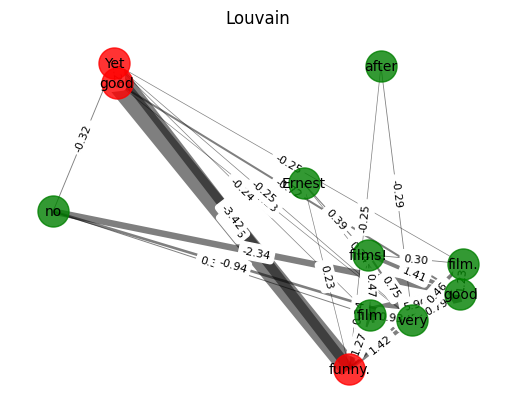

In [7]:
import networkx as nx
import re
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities

# 读取文件
with open('results/20250318_harsanyi_sum_optimization_0.025/result/dataset=custom-imdb-for-bertweet-nips2024-ucb-test_model=BERTweet#pretrain_seed=0/players=players-manual_lbl=correct_baseline=unk_bg=ori#/data/sample3/interaction.txt', 'r') as f:
    data = f.read()

# 解析玩家信息
players = {}
player_section = re.search(r'---------- Players ----------(.*?)---------- AND Interactions', data, re.DOTALL)
if player_section:
    for line in player_section.group(1).strip().split('\n'):
        match = re.match(r'Player (\w+): (.*)', line)
        if match:
            players[match.group(1)] = match.group(2)

# 解析AND Interactions
G = nx.Graph()
interaction_section = re.search(r'---------- AND Interactions.*?---------- OR Interactions', data, re.DOTALL)
if interaction_section:
    for line in interaction_section.group(0).split('\n'):
        match = re.match(r'I\((\w+)\): ([+-]?\d*\.\d+)', line)
        if match:
            nodes = list(match.group(1))
            weight = float(match.group(2))
            abs_weight = abs(weight)
            G.add_edge(nodes[0], nodes[1], weight=weight,abs_weight=abs_weight)

communities = list(louvain_communities(G, weight='abs_weight'))

# 打印社区结果
print("Louvain社区检测结果:")
for i, community in enumerate(communities):
    print(f"社区 {i+1}: {[players[n] for n in community]}")

weights = [abs(G[u][v]['weight'])*2 for u,v in G.edges()]

# 可视化
pos = nx.spring_layout(G, k=2.0, iterations=100)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# 绘制节点和社区
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), 
                         node_color=colors[i], 
                         node_size=500,
                         alpha=0.8)

# 绘制边和权重标签
edges = nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)

# 添加边权重标签
edge_labels = {(u, v): f"{d['weight']:.2f}"  # 保留两位小数
              for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='black',  # 标签颜色
    font_size=8,         # 标签字号
    label_pos=0.5        # 标签位置（0.5表示边中点）
)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, {n:players[n] for n in G.nodes()}, font_size=10)

plt.title("Louvain")
plt.axis('off')
plt.savefig('/mnt/data/hqdeng7/CSCIENCE/interaction_nlp_harsanyi/group/louvain/s3.png', dpi=300, bbox_inches='tight')
plt.show()